In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
'''plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})'''

plt.rcParams['text.usetex'] = True


In [11]:
xran = np.arange(0,10,0.01)
yran = np.sin(xran)

In [15]:
%matplotlib qt
plt.plot(xran,yran)
plt.title(r'Test',fontsize=30)
plt.xlabel(r'$\Phi$')
plt.ylabel(r'Intensity [Flux]')

Text(0, 0.5, 'Intensity [Flux]')


# Test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import variable as var
from disk import Disk
from chem import Chem
import matplotlib.pylab as pylab
import matplotlib.axes as ax


from scipy.stats import spearmanr
%matplotlib qt
dsk = Disk()
chm = Chem()
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

pylab.rc('font', **font)

[ 0.24790943  0.25681085  0.32614839  0.34128238  0.35780877  0.50062951
  0.67447689  0.81204281  0.90275687  3.62750936 12.48935045 32.27286169] 
 [1600. 1550. 1250. 1200. 1150.  850.  650.  550.  500.  143.   47.   20.] 
 [0.         0.00010307 0.00022804 0.00394425 0.00394425 0.0039924
 0.00432644 0.00432644 0.00432644 0.00496161 0.00815426 0.01122122]

 [  0.24790943   0.25681085   0.32614839   0.34128238   0.35780877
   0.50062951   0.67447689   0.81204281   0.90275687   3.62750936
  12.48935045  32.27286169 100.        ] 
 [1600.         1550.         1250.         1200.         1150.
  850.          650.          550.          500.          143.
   47.           20.            7.22742718] 
 [0.         0.00010307 0.00022804 0.00394425 0.00394425 0.0039924
 0.00432644 0.00432644 0.00432644 0.00496161 0.00815426 0.01122122
 0.01122122]


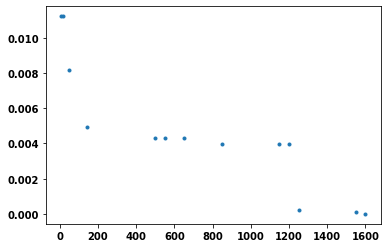

In [3]:
dsk.calc_r()
r_ice = dsk.r_arr
dtg = dsk.dtg
T = dsk.T_arr
r = r_ice/var.au
print (r,'\n' ,T,'\n',dtg)

r = np.append (r,100)
T100 = dsk.tempr(r[-1]*var.au)
T = np.append(T,T100)
dtg = np.append(dtg,dtg[-1])

print ('\n',r,'\n' ,T,'\n',dtg)

plt.plot(T,dtg,'.')

In [4]:
#Set zero
r0 = np.arange(.05,100.,0.005)*var.au
T0 = np.zeros_like(r0)
dg0 = np.zeros_like(r0)
ds0 = np.zeros_like(r0)
dtg0 = np.zeros_like(r0)

ch0 = np.zeros([len(r0),2,13])
C_g0 = np.zeros_like(r0)
C_d0 = np.zeros_like(r0)
O_g0 = np.zeros_like(r0)
O_d0 = np.zeros_like(r0)



for i in range(len(r0)):
    T0[i] = dsk.tempr(r0[i])
    dg0[i],ds0[i] = dsk.dens_r(r0[i])
    dtg0[i] = dsk.dTg
    chm.chem(T0[i])
    ch0[i,0] = chm.gas
    ch0[i,1] =chm.sld

In [22]:
name = 1
#Load data:
name_s = 'input/N_Atom.txt'
solar = np.loadtxt(name_s,dtype= str)[0:, 5].astype(float)

doc = 'Output/run_sum'+str(name)+'.txt'
dat = np.loadtxt(doc, dtype = str, skiprows = 1)[0:,1:].astype(float)

plt.figure()

#plt.plot(dat[:,11],(dat[:,13]),'.')
plt.scatter(dat[:,11],(dat[:,13]),c=dat[:,2], s = 10)
plt.xlabel('Metalicity')
plt.ylabel('C/O')
plt.show()


In [25]:
plt.figure()
plt.plot(dat[:,11],dat[:,2],'.')

In [18]:
#C/O ratio
%matplotlib qt
fig, ax1 = plt.subplots()

#plt.plot(dat[:,2],dat[:,11]*solar[3]/(dat[:,13]*solar[5]),'.')
plt.scatter(dat[:,5],dat[:,11]*solar[3]/(dat[:,13]*solar[5]),c=dat[:,2], s = 10)
#Plot the gas C/O
color = 'tab:red'
ax1.step(r0/var.au,ch0[:,0,3]/ch0[:,0,5], color=color, label = ' C/O (Gas) ', linewidth = 4.0)

#Plot the solid C/O
color = 'tab:green'
ax1.step(r0/var.au,ch0[:,1,3]/ch0[:,1,5]  ,color=color, label = ' C/O (Solid) ', linewidth = 4.0 )




#Axis
#plt.title('Mg/O')
ax1.tick_params(size=5,width=2)
ax1.set_xlabel(r'distance [AU]')
ax1.set_ylabel(r'c/o')
#plt.xscale('log')
plt.legend()
plt.show()

/home/niloo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/home/niloo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
